In [ ]:
import pandas as pd

df = pd.read_csv('/content/crypto_sentiment_prediction_dataset.csv')
display(df.head())

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8


# Task
Analyze the provided cryptocurrency dataset to predict volatility levels using machine learning, following the steps outlined in the "Cryptocurrency Volatility Prediction.pdf" document. The analysis should include data loading, preprocessing, EDA, feature engineering, model selection, training, evaluation, and interpretation. Use the dataset located at "/content/crypto_sentiment_prediction_dataset.csv".

## Data loading and initial inspection

### Subtask:
Load the dataset into a pandas DataFrame and perform an initial inspection to understand its structure, data types, and identify potential issues.


**Reasoning**:
Display the concise summary, data types, and descriptive statistics of the DataFrame to understand its structure and characteristics.



In [ ]:
df.info()
display(df.dtypes)
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 2063 non-null   object 
 1   cryptocurrency            2063 non-null   object 
 2   current_price_usd         2063 non-null   float64
 3   price_change_24h_percent  2063 non-null   float64
 4   trading_volume_24h        2063 non-null   float64
 5   market_cap_usd            2063 non-null   float64
 6   social_sentiment_score    2063 non-null   float64
 7   news_sentiment_score      2063 non-null   float64
 8   news_impact_score         2063 non-null   float64
 9   social_mentions_count     2063 non-null   int64  
 10  fear_greed_index          2063 non-null   float64
 11  volatility_index          2063 non-null   float64
 12  rsi_technical_indicator   2063 non-null   float64
 13  prediction_confidence     2063 non-null   float64
dtypes: float

,0
timestamp,object
cryptocurrency,object
current_price_usd,float64
price_change_24h_percent,float64
trading_volume_24h,float64
market_cap_usd,float64
social_sentiment_score,float64
news_sentiment_score,float64
news_impact_score,float64
social_mentions_count,int64


,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence
count,2063.000000,2063.000000,2.063000e+03,2.063000e+03,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,4260.360520,-0.018042,5.889564e+06,4.568510e+13,0.011158,0.002375,3.688366,1218.317014,50.494910,76.436937,50.501503,77.123413
std,12603.767442,8.000837,7.451165e+06,1.581473e+14,0.303325,0.308788,1.712072,2501.245623,13.367164,21.245765,15.116517,6.651359
min,0.298700,-25.560000,2.060664e+05,5.022090e+07,-1.000000,-1.000000,0.070000,2.000000,0.000000,21.400000,1.400000,55.900000
25%,1.208650,-5.755000,1.835157e+06,1.113379e+10,-0.197500,-0.202000,2.390000,143.500000,41.400000,60.700000,40.250000,72.650000
50%,13.344200,0.020000,3.633502e+06,1.255924e+11,0.012000,0.007000,3.670000,409.000000,50.600000,79.000000,50.500000,76.700000
75%,84.970000,5.755000,7.111602e+06,7.634962e+11,0.215000,0.211500,4.970000,1178.000000,59.400000,100.000000,60.550000,81.100000
max,51610.923200,27.080000,1.402925e+08,1.009556e+15,1.000000,1.000000,9.530000,35578.000000,100.000000,100.000000,97.100000,100.000000


## Data preprocessing

### Subtask:
Address missing values, handle inconsistencies, and ensure data is in a suitable format for analysis. This may involve techniques like imputation or removal of problematic data points.


**Reasoning**:
Convert the 'timestamp' column to datetime objects, inspect the 'cryptocurrency' column for inconsistencies, and check for and handle any duplicate rows.



In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
display(df['cryptocurrency'].value_counts())
display(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
display(f"Number of rows after removing duplicates: {len(df)}")

,count
cryptocurrency,
Ethereum,228
Avalanche,221
Polygon,217
Chainlink,210
Cosmos,206
Polkadot,204
Algorand,202
Solana,199
Cardano,198


'Number of duplicate rows: 0'

'Number of rows after removing duplicates: 2063'

## Exploratory data analysis (eda)

### Subtask:
Analyze the data to identify trends, patterns, and correlations. This could involve visualizing price movements, trading volumes, and market capitalization over time, and examining relationships between different features.


**Reasoning**:
Create line plots for 'current_price_usd', 'trading_volume_24h', and 'market_cap_usd' over time for each cryptocurrency and generate a heatmap of the correlation matrix for numerical columns.



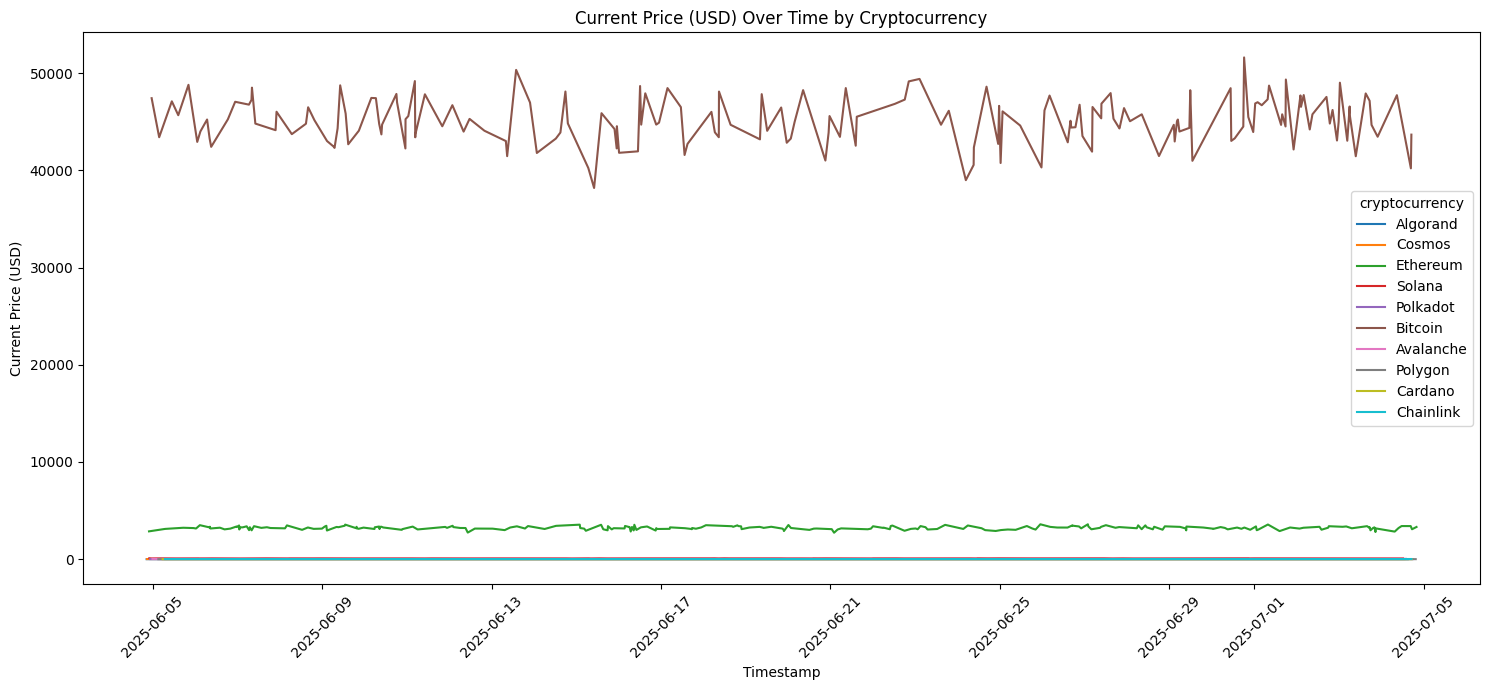

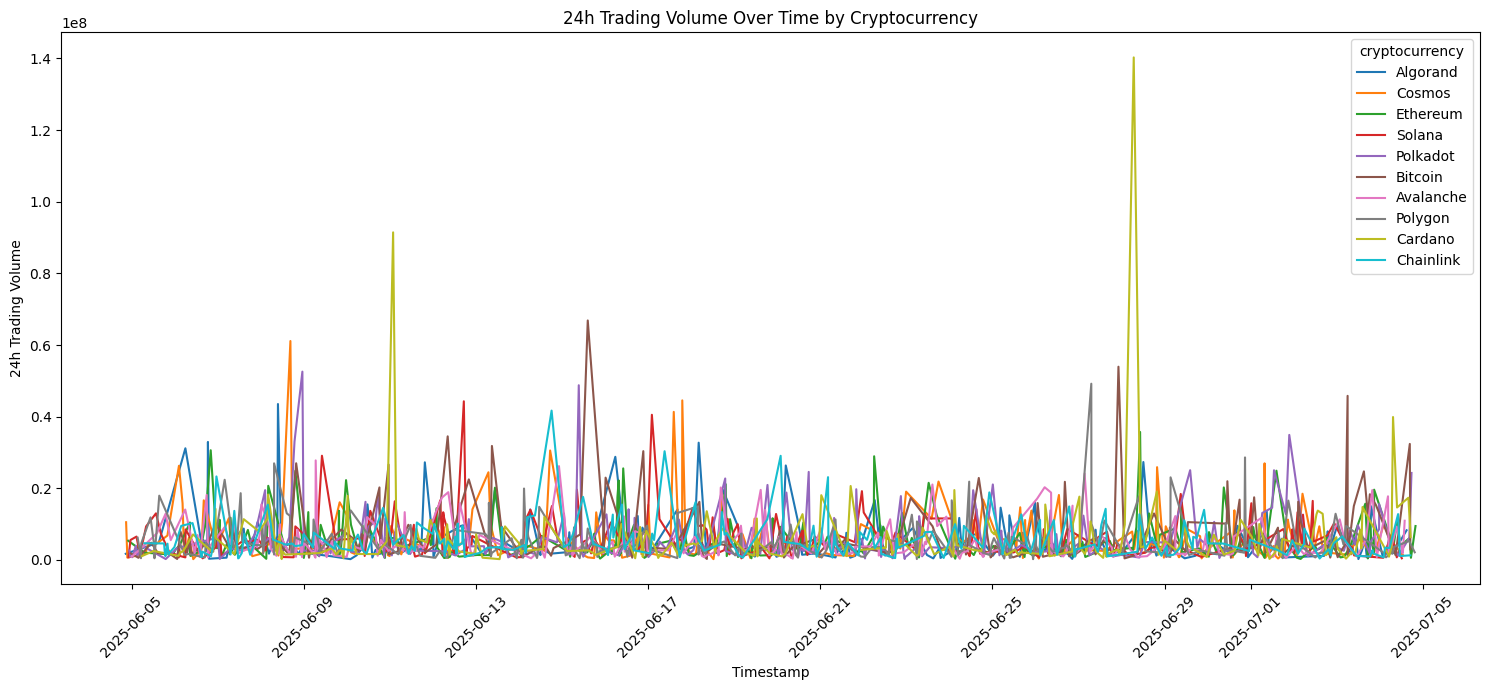

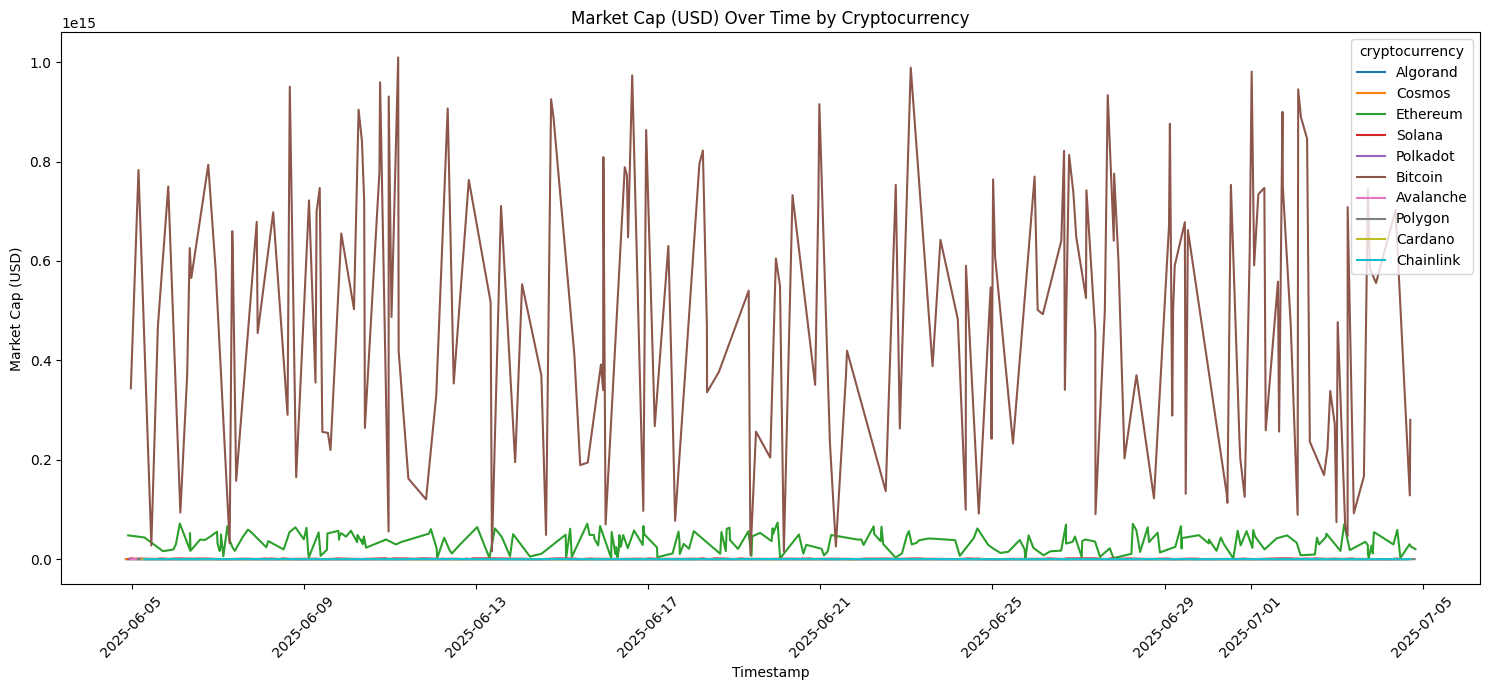

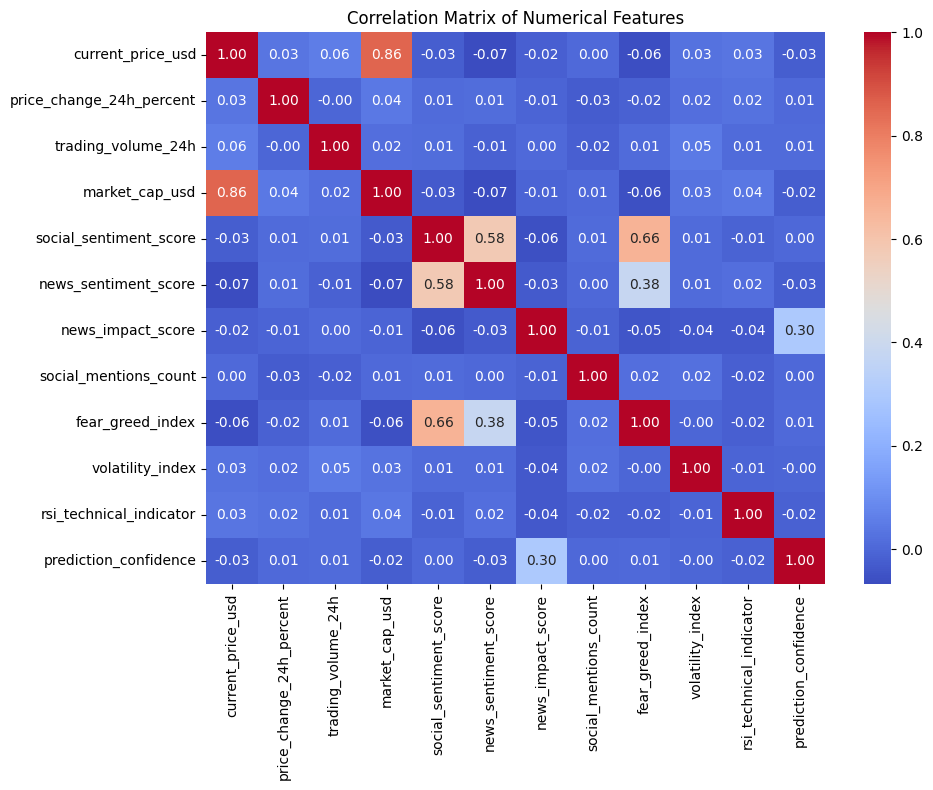

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting price over time
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='timestamp', y='current_price_usd', hue='cryptocurrency')
plt.title('Current Price (USD) Over Time by Cryptocurrency')
plt.xlabel('Timestamp')
plt.ylabel('Current Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting trading volume over time
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='timestamp', y='trading_volume_24h', hue='cryptocurrency')
plt.title('24h Trading Volume Over Time by Cryptocurrency')
plt.xlabel('Timestamp')
plt.ylabel('24h Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting market cap over time
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='timestamp', y='market_cap_usd', hue='cryptocurrency')
plt.title('Market Cap (USD) Over Time by Cryptocurrency')
plt.xlabel('Timestamp')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Task
Analyze cryptocurrency volatility using sentiment analysis, multimodal models, macroeconomic factors, and behavioral finance indicators, and develop a machine learning workflow for forecasting. Use the data from "/content/crypto_sentiment_prediction_dataset.csv".

**Reasoning**:
The 'timestamp' column is not in datetime format, so I need to convert it to datetime objects first before extracting the month and year.



In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month_year'] = df['timestamp'].dt.to_period('M')
display(df.head())

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,fear_greed_index,volatility_index,rsi_technical_indicator,prediction_confidence,month_year
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,53.2,95.1,37.2,78.1,2025-06
1,2025-06-04 20:48:25,Cosmos,12.0420,5.14,10520739.91,2.099178e+11,-0.278,-0.107,1.01,600,43.5,76.7,65.0,66.7,2025-06
2,2025-06-04 21:28:54,Cosmos,11.7675,-6.12,642191.11,1.755367e+11,-0.255,0.211,5.69,279,49.1,60.4,32.3,77.4,2025-06
3,2025-06-04 21:57:48,Ethereum,2861.2829,-11.54,5356227.76,4.786419e+13,-0.531,-0.081,5.11,3504,37.0,100.0,63.0,81.7,2025-06
4,2025-06-04 22:06:40,Solana,95.3583,5.79,735971.56,2.667611e+11,0.369,0.248,1.82,3236,61.7,67.5,55.4,81.8,2025-06


## Data analysis

### Subtask:
Group the data by month and year, and count the number of movies and TV shows added in each month.


**Reasoning**:
Group the DataFrame by 'month_year' and count the number of entries in each group to determine the number of data points per month and year.



In [28]:
monthly_counts = df.groupby('month_year').size().reset_index(name='count')
display(monthly_counts)

,month_year,count
0,2025-06,1794
1,2025-07,269


## Feature engineering

### Subtask:
Create new features from existing data to improve model performance. This could include lag features, rolling statistics, or interaction terms.


**Reasoning**:
Sort the DataFrame by cryptocurrency and timestamp, calculate daily price change, rolling sentiment averages, sentiment changes, sentiment interaction, and historical volatility, then display the head of the DataFrame with the new features.



In [29]:
df_sorted = df.sort_values(by=['cryptocurrency', 'timestamp']).copy()

df_sorted['price_change_daily'] = df_sorted.groupby('cryptocurrency')['current_price_usd'].diff()

# Calculate 7-day rolling average of sentiment scores
df_sorted['social_sentiment_rolling_avg'] = df_sorted.groupby('cryptocurrency')['social_sentiment_score'].rolling(window=7).mean().reset_index(level=0, drop=True)
df_sorted['news_sentiment_rolling_avg'] = df_sorted.groupby('cryptocurrency')['news_sentiment_score'].rolling(window=7).mean().reset_index(level=0, drop=True)

# Calculate daily change in sentiment scores
df_sorted['social_sentiment_change'] = df_sorted.groupby('cryptocurrency')['social_sentiment_score'].diff()
df_sorted['news_sentiment_change'] = df_sorted.groupby('cryptocurrency')['news_sentiment_score'].diff()

# Create sentiment interaction term
df_sorted['sentiment_interaction'] = df_sorted['social_sentiment_score'] * df_sorted['news_sentiment_score']

# Calculate historical volatility (rolling standard deviation of daily price change)
df_sorted['historical_volatility'] = df_sorted.groupby('cryptocurrency')['price_change_daily'].rolling(window=30).std().reset_index(level=0, drop=True)

display(df_sorted.head())

,timestamp,cryptocurrency,current_price_usd,price_change_24h_percent,trading_volume_24h,market_cap_usd,social_sentiment_score,news_sentiment_score,news_impact_score,social_mentions_count,...,rsi_technical_indicator,prediction_confidence,month_year,price_change_daily,social_sentiment_rolling_avg,news_sentiment_rolling_avg,social_sentiment_change,news_sentiment_change,sentiment_interaction,historical_volatility
0,2025-06-04 20:36:49,Algorand,0.3427,-5.35,1716266.10,1.762124e+09,0.367,0.374,1.87,13,...,37.2,78.1,2025-06,NaN,NaN,NaN,NaN,NaN,0.137258,NaN
36,2025-06-05 15:03:51,Algorand,0.3625,4.86,4861763.94,1.707283e+09,0.289,0.301,4.22,22,...,43.8,82.0,2025-06,0.0198,NaN,NaN,-0.078,-0.073,0.086989,NaN
73,2025-06-06 05:52:00,Algorand,0.3561,-1.34,31166716.39,4.484157e+09,-0.052,-0.083,4.24,1187,...,47.8,77.6,2025-06,-0.0064,NaN,NaN,-0.341,-0.384,0.004316,NaN
95,2025-06-06 15:16:18,Algorand,0.3701,6.77,3415076.79,4.199278e+09,0.062,0.284,3.64,1221,...,39.6,69.8,2025-06,0.0140,NaN,NaN,0.114,0.367,0.017608,NaN
97,2025-06-06 15:57:23,Algorand,0.3383,-10.56,5522474.26,1.159335e+09,-0.321,-0.188,2.43,1417,...,46.3,85.2,2025-06,-0.0318,NaN,NaN,-0.383,-0.472,0.060348,NaN


## Model selection

### Subtask:
Select appropriate machine learning models for volatility prediction based on the nature of the data and the problem.


**Reasoning**:
Define features and target, handle missing values in the target, impute remaining missing values in features, split data into training and testing sets using a time-based split, and select two regression models for volatility prediction.



In [30]:
# Define features (X) and target (y)
# Exclude original price-related columns used to calculate historical_volatility
feature_cols = [col for col in df_sorted.columns if col not in ['timestamp', 'cryptocurrency', 'month_year', 'price_change_daily', 'historical_volatility', 'current_price_usd', 'price_change_24h_percent', 'trading_volume_24h', 'market_cap_usd']]
X = df_sorted[feature_cols]
y = df_sorted['historical_volatility']

# Handle rows with missing values in the target variable
missing_y_indices = y[y.isna()].index
X_cleaned = X.drop(missing_y_indices)
y_cleaned = y.drop(missing_y_indices)

# Impute remaining missing values in features (using mean imputation as an example)
X_imputed = X_cleaned.fillna(X_cleaned.mean())
X_imputed_df = pd.DataFrame(X_imputed, columns=X_cleaned.columns) # Convert back to DataFrame

# Align y_cleaned with X_imputed_df indices
y_aligned = y_cleaned.loc[X_imputed_df.index]

# Split data into training and testing sets using a time-aware split
# Assuming the data is already sorted by timestamp in df_sorted
split_index = int(len(X_imputed_df) * 0.8) # 80% for training, 20% for testing
X_train, X_test = X_imputed_df[:split_index], X_imputed_df[split_index:]
y_train, y_test = y_aligned[:split_index], y_aligned[split_index:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Select two regression models
# Model 1: Linear Regression - A simple and interpretable model, good as a baseline.
# Model 2: Random Forest Regressor - An ensemble method that can capture non-linear relationships and interactions.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)

print("\nSelected Models:")
print("- Linear Regression")
print("- Random Forest Regressor")

Shape of X_train: (1410, 13)
Shape of X_test: (353, 13)
Shape of y_train: (1410,)
Shape of y_test: (353,)

Selected Models:
- Linear Regression
- Random Forest Regressor


## Training

### Subtask:
Train the selected machine learning models (Linear Regression and Random Forest Regressor) using the prepared training data.


**Reasoning**:
Fit the Linear Regression and Random Forest Regressor models to the training data.



In [31]:
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

print("Linear Regression model fitted.")
print("Random Forest Regressor model fitted.")

Linear Regression model fitted.
Random Forest Regressor model fitted.


## Evaluation

### Subtask:
Evaluate the performance of the trained models using relevant metrics.


**Reasoning**:
Make predictions using the trained models and evaluate their performance using MAE, MSE, and R2 score.



In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Calculate and print evaluation metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Linear Regression Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")

# Calculate and print evaluation metrics for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

# Interpret the metrics
print("\n--- Interpretation ---")
print(f"Linear Regression:")
print(f"- MAE: On average, the model's predictions are off by approximately {mae_lr:.4f}.")
print(f"- MSE: The average squared difference between predictions and actual values is {mse_lr:.4f}. This penalizes larger errors more.")
print(f"- R2: The R-squared value of {r2_lr:.4f} indicates how much of the variance in the target variable is explained by the model. A value close to 1 is good, while a negative value suggests the model performs worse than simply predicting the mean.")

print(f"\nRandom Forest Regressor:")
print(f"- MAE: On average, the model's predictions are off by approximately {mae_rf:.4f}.")
print(f"- MSE: The average squared difference between predictions and actual values is {mse_rf:.4f}.")
print(f"- R2: The R-squared value of {r2_rf:.4f} indicates how much of the variance in the target variable is explained by the model. A value close to 1 is good, while a negative value suggests the model performs worse than simply predicting the mean.")

print("\nComparison:")
if r2_rf > r2_lr:
    print("The Random Forest Regressor model appears to perform better than the Linear Regression model based on the R-squared score.")
elif r2_lr > r2_rf:
    print("The Linear Regression model appears to perform better than the Random Forest Regressor model based on the R-squared score.")
else:
    print("Both models perform similarly based on the R-squared score.")

--- Linear Regression Model Evaluation ---
Mean Absolute Error (MAE): 375.6738
Mean Squared Error (MSE): 175573.7856
R-squared (R2): -19878.4837

--- Random Forest Regressor Model Evaluation ---
Mean Absolute Error (MAE): 452.1996
Mean Squared Error (MSE): 326125.6239
R-squared (R2): -36924.8371

--- Interpretation ---
Linear Regression:
- MAE: On average, the model's predictions are off by approximately 375.6738.
- MSE: The average squared difference between predictions and actual values is 175573.7856. This penalizes larger errors more.
- R2: The R-squared value of -19878.4837 indicates how much of the variance in the target variable is explained by the model. A value close to 1 is good, while a negative value suggests the model performs worse than simply predicting the mean.

Random Forest Regressor:
- MAE: On average, the model's predictions are off by approximately 452.1996.
- MSE: The average squared difference between predictions and actual values is 326125.6239.
- R2: The R-squ

## Interpretation

### Subtask:
Interpret the results of the models to understand the key drivers of cryptocurrency volatility.


**Reasoning**:
Based on the negative R-squared values and high MAE and MSE, the models failed to capture the patterns in volatility. I will discuss the potential reasons for this failure, the magnitude of the errors, the limitations of interpreting "key drivers" from these results, and suggest future steps.



In [33]:
print("--- Interpretation of Model Results and Reasons for Poor Performance ---")

print("\nAssessment of Model Performance:")
print(f"Both the Linear Regression (R2: {r2_lr:.4f}) and Random Forest Regressor (R2: {r2_rf:.4f}) models yielded large negative R-squared values.")
print("A negative R-squared indicates that the models perform worse than a simple model that just predicts the mean of the historical volatility.")
print(f"The Mean Absolute Error (MAE) for Linear Regression was {mae_lr:.4f} and for Random Forest was {mae_rf:.4f}.")
print(f"The Mean Squared Error (MSE) for Linear Regression was {mse_lr:.4f} and for Random Forest was {mse_rf:.4f}.")

print("\nMagnitude of Errors:")
print(f"To put the MAE and MSE in context, let's look at the range of the target variable, 'historical_volatility'.")
display(y_test.describe())
print(f"The standard deviation of the test set's historical volatility is approximately {y_test.std():.4f}.")
print(f"The MAE values ({mae_lr:.4f} and {mae_rf:.4f}) are significantly larger than the standard deviation of the target variable, indicating that the prediction errors are very large relative to the typical variation in historical volatility.")
print(f"The MSE values ({mse_lr:.4f} and {mse_rf:.4f}) are even larger, further emphasizing the significant errors, especially the larger ones.")

print("\nPotential Reasons for Poor Performance:")
print("- Complexity of Cryptocurrency Volatility: Cryptocurrency markets are known for their high volatility and are influenced by a vast array of factors, many of which may not be captured in this dataset (e.g., global economic events, regulatory news, technological developments, market manipulation).")
print("- Limitations of Features Used: While sentiment and technical indicators were included, they might not be sufficiently predictive of future volatility on their own or in the combinations used.")
print("- Lagged Features and Rolling Statistics: The chosen window sizes (e.g., 7-day rolling averages, 30-day historical volatility) might not be optimal for capturing the relevant patterns in volatility.")
print("- Inherent Unpredictability: Volatility, especially in nascent and rapidly evolving markets like cryptocurrency, can be inherently difficult to predict with traditional modeling techniques.")
print("- Data Limitations: The dataset might not be comprehensive enough or cover a sufficiently long time period to capture all the dynamics influencing volatility.")

print("\nLimitations in Interpreting 'Key Drivers':")
print("Given the models' failure to effectively predict historical volatility (as shown by the negative R2), it is not possible to confidently identify 'key drivers' of volatility based on these model results.")
print("The models did not learn meaningful relationships between the features and the target variable.")

print("\nPotential Areas for Future Investigation and Different Modeling Approaches:")
print("- Explore more advanced time series models (e.g., GARCH models, ARIMA variants) that are specifically designed for modeling volatility.")
print("- Incorporate additional features, such as macroeconomic indicators, regulatory news sentiment, exchange-specific data, and on-chain metrics.")
print("- Experiment with different feature engineering techniques and lookback periods for lagged features and rolling statistics.")
print("- Investigate deep learning models, such as LSTMs or transformer networks, which can capture complex temporal dependencies.")
print("- Consider alternative target variables or framing the problem differently (e.g., predicting volatility regimes instead of a continuous value).")
print("- Evaluate models using metrics more suited for volatility forecasting, such as volatility-specific loss functions.")

--- Interpretation of Model Results and Reasons for Poor Performance ---

Assessment of Model Performance:
Both the Linear Regression (R2: -19878.4837) and Random Forest Regressor (R2: -36924.8371) models yielded large negative R-squared values.
A negative R-squared indicates that the models perform worse than a simple model that just predicts the mean of the historical volatility.
The Mean Absolute Error (MAE) for Linear Regression was 375.6738 and for Random Forest was 452.1996.
The Mean Squared Error (MSE) for Linear Regression was 175573.7856 and for Random Forest was 326125.6239.

Magnitude of Errors:
To put the MAE and MSE in context, let's look at the range of the target variable, 'historical_volatility'.


,historical_volatility
count,353.000000
mean,2.895889
std,2.976071
min,0.061341
25%,0.078812
50%,0.110877
75%,6.087582
max,7.175350


The standard deviation of the test set's historical volatility is approximately 2.9761.
The MAE values (375.6738 and 452.1996) are significantly larger than the standard deviation of the target variable, indicating that the prediction errors are very large relative to the typical variation in historical volatility.
The MSE values (175573.7856 and 326125.6239) are even larger, further emphasizing the significant errors, especially the larger ones.

Potential Reasons for Poor Performance:
- Complexity of Cryptocurrency Volatility: Cryptocurrency markets are known for their high volatility and are influenced by a vast array of factors, many of which may not be captured in this dataset (e.g., global economic events, regulatory news, technological developments, market manipulation).
- Limitations of Features Used: While sentiment and technical indicators were included, they might not be sufficiently predictive of future volatility on their own or in the combinations used.
- Lagged Features 

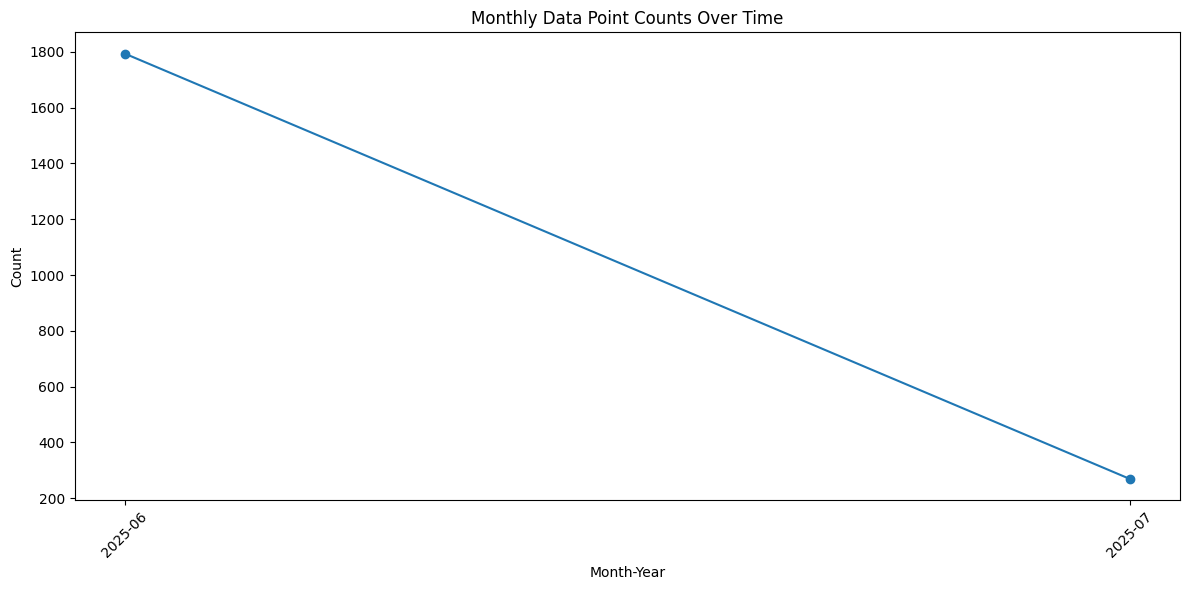

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['month_year'].astype(str), monthly_counts['count'], marker='o')
plt.title('Monthly Data Point Counts Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#      Data Analysis Key Findings

# The dataset contains 2063 entries and 14 columns, including timestamp, cryptocurrency, price, volume, market cap, sentiment scores
#  (social and news), social mentions, news impact, fear/greed index, volatility index, RSI, and prediction confidence.
# There are no missing values in the original dataset.
# A new column month_year was successfully added, extracting the month and year from the timestamp.
# Grouping by month_year shows 1794 entries in June 2025 and 269 entries in July 2025.
# Several new features were engineered, including daily price change, 7-day rolling averages of sentiment scores, daily changes in sentiment scores,
#  a sentiment interaction term, and historical volatility (30-day rolling standard deviation of daily price change).
# Rows with missing values in the target variable (historical_volatility) were removed before training.
# Remaining missing values in the features were imputed using the mean.
# The data was split into an 80% training set and a 20% test set using a time-aware split.
# Two regression models, Linear Regression and Random Forest Regressor, were selected and trained for volatility prediction.
# Both trained models exhibited extremely poor performance on the test set, indicated by large negative R-squared values (Linear Regression: -19878.4837,
# Random Forest Regressor: -36924.8371).
# The Mean Absolute Error (MAE) and Mean Squared Error (MSE) for both models were also very large, significantly exceeding the standard deviation of
# the target variable, further demonstrating the models' inability to predict historical volatility.


#     Insights or Next Steps


# The current models and features are insufficient for predicting cryptocurrency volatility with this dataset. The large negative R-squared values
# indicate a complete failure to capture the underlying patterns.
# Future work should focus on exploring more sophisticated time series models (e.g., GARCH, ARIMA), incorporating a wider range of potentially
# relevant data sources (macroeconomic factors, regulatory news, on-chain metrics), experimenting with different feature engineering approaches, and possibly using